In [1]:
import Bio
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt

In [69]:
dist = np.array([[0, 12, 14, 14, 15],
                 [12, 0, 12, 12, 13],
                 [14, 12, 0, 6, 7],
                 [14, 12, 6, 0, 3],
                 [15, 13, 7, 3, 0]])
taxa = ["a","b","c","d","e"]
T = nx.Graph()

In [114]:
def NJM(taxa,mtx,T):
    print(taxa)
    r_taxa = []
    for i in range(len(taxa)):
        res = 0
        for j in range(len(taxa)):
            res += mtx[i][j]
        r_taxa.append(res)
    print(r_taxa)
    print(mincomb(r_taxa,mtx))
    print("mingot")
    eye = mincomb(r_taxa,mtx)[0]
    jay = mincomb(r_taxa,mtx)[1]
    T.add_node(taxa[eye])
    T.add_node(taxa[jay])
    T.add_node(taxa[eye]+taxa[jay])
    if len(r_taxa)==2:
        T.remove_node(taxa[eye]+taxa[jay])
        print(mtx[eye][jay])
        plt.figure(figsize=(7,7))
        T.add_edge(taxa[eye], taxa[jay], weight= mtx[eye][jay])
        pos = nx.spring_layout(T)
        nx.draw(T, pos=pos, with_labels=True, node_size=800, font_weight='bold')
        labels = nx.get_edge_attributes(T,'weight')
        nx.draw_networkx_edge_labels(T,pos,edge_labels=labels)
        return
    newmtx,disti,distj = merge(eye,jay,r_taxa,mtx)
    T.add_edge(taxa[eye], taxa[eye]+taxa[jay], weight= disti)
    T.add_edge(taxa[jay], taxa[eye]+taxa[jay], weight= distj)
    if newmtx.shape[0]>=2:
        NJM(np.append(np.delete(taxa,[eye,jay]),taxa[eye]+taxa[jay]),newmtx,T)

def mincomb(taxa,mtx):
    res = [math.inf,math.inf]
    thresh = math.inf
    for i in range(len(taxa)):
        for j in range(len(taxa)):
            if i==j:
                continue
            mini = mtx[i][j] - (taxa[i]+taxa[j])/(len(taxa)-2)
            if mini<thresh:
                thresh = mini
                res = [i,j]
    return res

def merge(i,j,taxa,mtx):
    distj = 0.5* (mtx[i][j]+(taxa[j]-taxa[i])/(len(taxa)-2))
    disti = 0.5* (mtx[i][j]+(taxa[i]-taxa[j])/(len(taxa)-2))
    
    print(disti,distj)
    
    newdists = []
    for x in range(mtx.shape[0]):
        if x!=i and x!=j:
            temp = (mtx[i][x]+mtx[j][x]-mtx[i][j])/2
            newdists.append(temp)
    newdists.append(0)
    
    umtx = np.zeros((mtx.shape[0]-1,mtx.shape[0]-1))
    umtx[mtx.shape[0]-2] = newdists
    for n in range(mtx.shape[0]-2):
        umtx[n][mtx.shape[0]-2] = newdists[n]
    umtx[:umtx.shape[0]-1,:umtx.shape[1]-1] = deleteMtx(i,j,mtx)
    print(umtx)
    return umtx,disti,distj
    
def deleteMtx(i,j,mtx):
    nmtx = np.delete(mtx,[i,j],0)
    nmtx = np.delete(nmtx,[i,j],1)
    np.delete(mtx,i,1)
    np.delete(mtx,j,0)
    np.delete(mtx,j,1)
    print(nmtx)
    return nmtx
    
            

['a', 'b', 'c', 'd', 'e']
[55, 49, 39, 35, 38]
[0, 1]
mingot
7.0 5.0
[[0 6 7]
 [6 0 3]
 [7 3 0]]
[[0. 6. 7. 7.]
 [6. 0. 3. 7.]
 [7. 3. 0. 8.]
 [7. 7. 8. 0.]]
['c' 'd' 'e' 'ab']
[20.0, 16.0, 18.0, 22.0]
[0, 3]
mingot
3.0 4.0
[[0. 3.]
 [3. 0.]]
[[0. 3. 3.]
 [3. 0. 4.]
 [3. 4. 0.]]
['d' 'e' 'cab']
[6.0, 7.0, 7.0]
[0, 1]
mingot
1.0 2.0
[[0.]]
[[0. 2.]
 [2. 0.]]
['cab' 'de']
[2.0, 2.0]
[0, 1]
mingot
2.0


C:\ProgramData\Miniconda3\envs\CS904\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


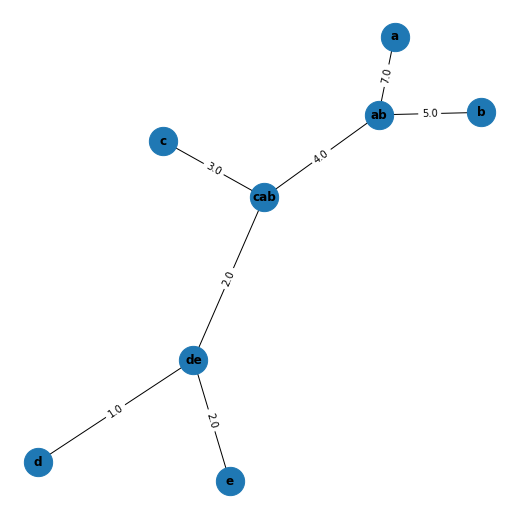

In [115]:
NJM(taxa,dist,T)